                                        SEGUNDO PROYECTO DE EMTECH
                                               PROYECTO 2
                                         GUSTAVO MÚZQUIZ RODRÍGUEZ
                                       gustavo.muzquiz@upaep.edu.mx
                          [https://github.com/gustavo345-DataForce/PROYECTO_2_EMTECH]        

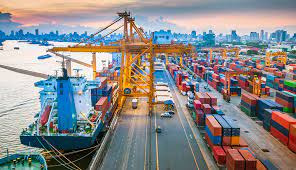

In [65]:
from IPython.display import Image
Image("D:\Descargas\EMTECH\exportimport.jpg")

Índice:

1)Introducción
2)Analis de datos
3)Estrategia
4)Conclusiones

Introducción

El presente análisis realiza una propuesta que permita enfocar las prioridades de la estrategia operativa 2021; para ello, se plantea analizar la viabilidad de 3 opciones de enfoque: 

                 1)rutas de importación y exportación
                 2)medio de transporte utlizado 
                 3)valor total de importaciones y exportaciones
                 
Considerando el data analyst se eligirá cúal de las opciones de la empresa debe ser la más adecuada para que pueda ser, en su estrategia operativa, financieramente solvente. Esto significa brindar áreas de oportunidad a la empresa para que pueda fortalecerse económicamente de tal forma que pueda operar eficientemente, consolidaando su rentabilidad económica en los mercados financieros nacionales e internacionales. 

Primeramente empezamos cargando la base de datos

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ruta = 'synergy_logistics_database.csv'
datos = pd.read_csv(ruta, index_col="register_id")

Si empezamos a explorar un poco la base de datos. 

In [4]:
datos.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [5]:
datos.tail()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000
19056,Imports,Malaysia,Singapore,2020,01/07/20,Gas turbines,Sea,Union Energy Co,30000000


Podemos observar que la base de datos contiene los elementos necesarios para poder hacer una estudio de datos profundo para tomar las mejores decisiones:

             1)el id del registro
             2)la clasifación de exportación o importación
             3)el destino de origen
             4)año
             5)fecha
             6)producto
             7)medio de transporte por el cual fue trasladado
             8)el nombre de la compañía que realizó la operación
             9)el valor total de la operación
             
Tambien sabemos que hay, en toda la base de datos, 19056 datos.
Por ejmplo, podemos, confirmar la anterior información con el siguientes codigo:

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19056 entries, 1 to 19056
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   direction       19056 non-null  object
 1   origin          19056 non-null  object
 2   destination     19056 non-null  object
 3   year            19056 non-null  int64 
 4   date            19056 non-null  object
 5   product         19056 non-null  object
 6   transport_mode  19056 non-null  object
 7   company_name    19056 non-null  object
 8   total_value     19056 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


En síntesis, podemos obtener la estadística descriptiva de cada variable dentro de la base de datos.Pero dado que hay variables no númericas, como tal no podríamos obtener un resultado de la misma naturaleza. La estadística descriptiva del año, nos indica que el año promedio en donde se capturó la información que tenemos fue en el 2017.

In [21]:
datos.describe()

,year,total_value
count,19056.000000,1.905600e+04
mean,2017.496327,1.131881e+07
std,1.706975,1.536656e+07
min,2015.000000,0.000000e+00
25%,2016.000000,6.400000e+04
50%,2017.000000,5.000000e+06
75%,2019.000000,1.600000e+07
max,2020.000000,2.850000e+08


Si queremos ver la estadística descriptiva de por ejemplo, el valor de las importaciones y de las importaciones (es decir, de ambas operaciones), tenemos que:

In [22]:
datos['total_value'].describe()

count    1.905600e+04
mean     1.131881e+07
std      1.536656e+07
min      0.000000e+00
25%      6.400000e+04
50%      5.000000e+06
75%      1.600000e+07
max      2.850000e+08
Name: total_value, dtype: float64

Una vez que revisamos la base de datos y tenemos un contexto sobre la situación operativa de la empresa, podemos empezar a desarrollar los ejes de análisis antes planteados. 

OBTENIENDO LAS 10 RUTAS MÁS DEMANDADAS ACORDE CON LOS FLUJOS DE IMPORTACIONES Y EXPORTACIÓN

In [7]:
importaciones= datos['direction']=="Imports"

In [8]:
exportaciones= datos['direction']=="Exports"

In [9]:
volumen = datos['total_value']

In [10]:
rutas = datos['transport_mode']

In [11]:
origen = datos['origin']

In [12]:
destino = datos['destination']

In [13]:
df = pd.DataFrame()

In [14]:
df["Importaciones"]= importaciones
df["Exportaciones"]= exportaciones
df["rutas"]= rutas
df["origen"]= origen
df["destino"]= destino
df["valor total"] = volumen
print(df)

             Importaciones  Exportaciones rutas    origen    destino  \
register_id                                                            
1                    False           True   Sea     Japan      China   
2                    False           True   Sea     Japan      China   
3                    False           True   Sea     Japan      China   
4                    False           True   Sea     Japan      China   
5                    False           True   Sea     Japan      China   
...                    ...            ...   ...       ...        ...   
19052                 True          False   Sea     Japan  Singapore   
19053                 True          False   Sea  Malaysia  Singapore   
19054                 True          False   Sea  Malaysia  Singapore   
19055                 True          False   Sea  Malaysia  Singapore   
19056                 True          False   Sea  Malaysia  Singapore   

             valor total  
register_id               
1        

In [15]:
df.head()

,Importaciones,Exportaciones,rutas,origen,destino,valor total
register_id,,,,,,
1,False,True,Sea,Japan,China,33000000
2,False,True,Sea,Japan,China,16000000
3,False,True,Sea,Japan,China,29000000
4,False,True,Sea,Japan,China,14000000
5,False,True,Sea,Japan,China,17000000


In [16]:
df[df['Importaciones']==True].sort_values('valor total', ascending = False).head(10)

,Importaciones,Exportaciones,rutas,origen,destino,valor total
register_id,,,,,,
16173,True,False,Sea,China,United Arab Emirates,85000000
16298,True,False,Road,China,Thailand,78000000
16320,True,False,Road,China,Thailand,75000000
15891,True,False,Sea,Spain,Mexico,73000000
16105,True,False,Sea,South Korea,United Arab Emirates,69000000
16276,True,False,Sea,Singapore,Thailand,69000000
16259,True,False,Rail,Malaysia,Thailand,69000000
16256,True,False,Rail,Malaysia,Thailand,68000000
15989,True,False,Sea,China,United Arab Emirates,67000000


Como se puede observar, las 10 rutas más demandas de acuerdo con sus flujos de IMPORTACIONES son las siguientes:

1)China-EAU
2)China-Tailandia
3)China-Tailandia (2)
4)España-México
5)Surcorea-EAU
6)Singapur-Tailandia
7)Malasia-Tailandia
8)Malasia-Tailandia(2)
9)China-EAU
10)Malasia-Tailandia(3)

In [17]:
df[df['Exportaciones']==True].sort_values('valor total', ascending=False).head(10)

,Importaciones,Exportaciones,rutas,origen,destino,valor total
register_id,,,,,,
5646,False,True,Sea,France,USA,285000000
5502,False,True,Road,Netherlands,Belgium,229000000
6098,False,True,Road,France,Belgium,148000000
6154,False,True,Road,France,Belgium,142000000
814,False,True,Air,China,Mexico,140000000
6008,False,True,Sea,France,United Kingdom,128000000
807,False,True,Air,China,Mexico,127000000
5980,False,True,Sea,France,United Kingdom,127000000
783,False,True,Air,China,Mexico,116000000


Las 10 rutas más demandadas de acuerdo con sus flujos de EXPORTACIONES son las siguientes:
1)Francia-EEUU
2)Holanda-Bélgica
3)Francia-Bélgica
4)Francia-Bélgica(2)
5)China-México
6)Francia-UK
7)China-México(2)
8)Francia-UK(2)
9)China-México(3)
10)Francia-Uk(3)

MEDIOS DE TRANSPORTES UTILIZADOS

In [18]:
importaciones = datos['direction']=="Imports"

In [19]:
exportaciones = datos['direction']=="Exports"

In [20]:
df1 = pd.DataFrame()

In [21]:
df1 ['Importaciones']=importaciones
df1 ['Exportaciones']= exportaciones
df1 ['medio de transporte']= rutas
print(df1)

             Importaciones  Exportaciones medio de transporte
register_id                                                  
1                    False           True                 Sea
2                    False           True                 Sea
3                    False           True                 Sea
4                    False           True                 Sea
5                    False           True                 Sea
...                    ...            ...                 ...
19052                 True          False                 Sea
19053                 True          False                 Sea
19054                 True          False                 Sea
19055                 True          False                 Sea
19056                 True          False                 Sea

[19056 rows x 3 columns]


<Figure size 1152x432 with 0 Axes>

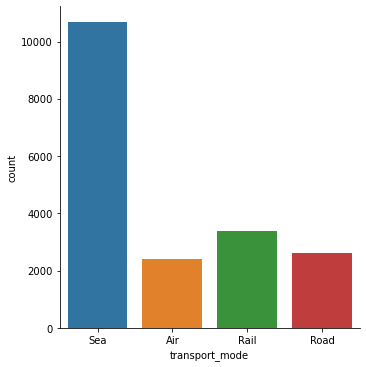

In [22]:
#creamos un panoramo del uso de los medios de tranportes tanto para las imoprtaciones como para las exportaciones
plt.figure(figsize=(16,6))

sns.catplot(x='transport_mode', data=datos,kind='count')

Lo que podemos ver es que el medio de trasnporte que más utliza la empresa es por medio del mar, seguido del ferrocarril, carreteras y finalmente por aire. Pero esto es para todas las operaciones que realiza la empresa, es decir, tanto para importaciones como para exportaciones. 

In [23]:
df1[df1['Exportaciones']==True].groupby(['medio de transporte']).count().sort_values('Exportaciones', ascending = False).head(4)
                                    #  freq = df.groupby(['A']).count() 

,Importaciones,Exportaciones
medio de transporte,,
Sea,8434,8434
Rail,2780,2780
Road,2149,2149
Air,2045,2045


Text(0.5, 0, 'frecuencia de medios de transporte DE EXPORTACIONES')

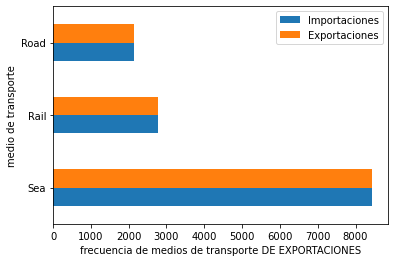

In [24]:
df1[df1['Exportaciones']==True].groupby(['medio de transporte']).count().sort_values('Exportaciones', ascending = False).head(3).plot(kind='barh')
plt.xlabel('frecuencia de medios de transporte DE EXPORTACIONES')

Como podemos observar y dado que la tabla anterior es válida para las exportaciones, podemos saber con certeza que, por medio del mar se hacen 8434 exportaciones, por trenes se hacen 2780 exportaciones y por carretera se hace 2149 exportaciones.

LOS 3 MEDIOS DE TRANSPORTE DE LAS EXPORTACIONES

Como podemos observar los 3 principales medios de transporte de las EXPORTACIONES de Synergy Logistics se hacen por:

1)Mar 
2)Trenes 
3)Carreteras

LOS 3 MEDIOS DE TRANPOSRTE DE LAS IMPORTACIONES

Text(0.5, 0, 'frecuencia de medios de transporte DE IMPORTACIONES')

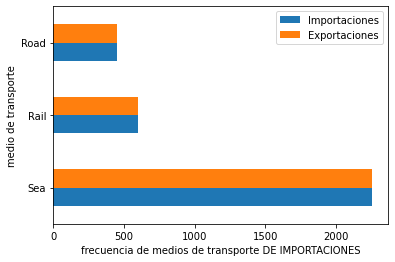

In [25]:
df1[df1['Importaciones']==True].groupby(['medio de transporte']).count().sort_values('Importaciones', ascending = False).head(3).plot(kind='barh')
plt.xlabel('frecuencia de medios de transporte DE IMPORTACIONES')
                                    #  freq = df.groupby(['A']).count() 

In [26]:
df1[df1['Importaciones']==True].groupby(['medio de transporte']).count().sort_values('Importaciones', ascending = False).head(4)
                                    #  freq = df.groupby(['A']).count() 

,Importaciones,Exportaciones
medio de transporte,,
Sea,2254,2254
Rail,601,601
Road,449,449
Air,344,344


Como podemos observar, en las IMOPRTACIONES (solo la columnas de las importaciones es válidos) se realizan 2254 por mar, 601 por trenes y 449 por carreteras. Siendo el 1)mar, 2)trenes y 3)carreteras, los tres principales medios de tranpsorte de las importaciones que hace la empresa Synergy Logistics. 

El medio que pueden reducir son las que se hacen por el aire, es decir, dado que este medio de transporte es muy poco solicitado, en comparación con el mar, los trenes o las carreteras, es posible que la empresa oueda concentrarse exclusivamente en los estos tres primeros. 

VALOR DE LAS IMOPRTACIONES Y EXPORTACIONES (EL VALOR DE INTERÉS ES AQUE SE ENCUENTRAN EN AMBOS)

In [27]:
valorcompleto = datos['total_value']

In [28]:
pais_que_nos_contrata = datos['origin']

In [29]:
df3 = pd.DataFrame()

In [30]:
df3['valor de las transacciones'] = valorcompleto
df3['Pais contratista'] = pais_que_nos_contrata
print(df3)

             valor de las transacciones Pais contratista
register_id                                             
1                              33000000            Japan
2                              16000000            Japan
3                              29000000            Japan
4                              14000000            Japan
5                              17000000            Japan
...                                 ...              ...
19052                           1000000            Japan
19053                           2000000         Malaysia
19054                          33000000         Malaysia
19055                          13000000         Malaysia
19056                          30000000         Malaysia

[19056 rows x 2 columns]


<AxesSubplot:ylabel='Pais contratista'>

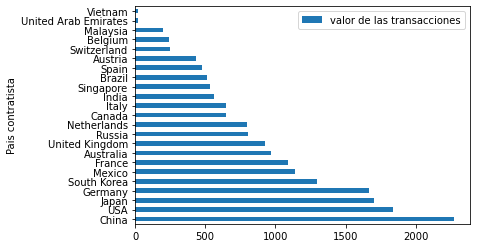

In [31]:
df3.groupby(['Pais contratista']).count().sort_values('valor de las transacciones', ascending = False).plot(kind='barh')
                                    #  freq = df.groupby(['A']).count() 

En la anterior gráfica es posible observar el número de transacciones que realiza cada país. 

In [37]:
df3.groupby(['Pais contratista']).count().sort_values('valor de las transacciones', ascending = False).sum()
                                    #  freq = df.groupby(['A']).count() 

valor de las transacciones    19056
dtype: int64

<AxesSubplot:ylabel='valor de las transacciones'>

<Figure size 2664x720 with 0 Axes>

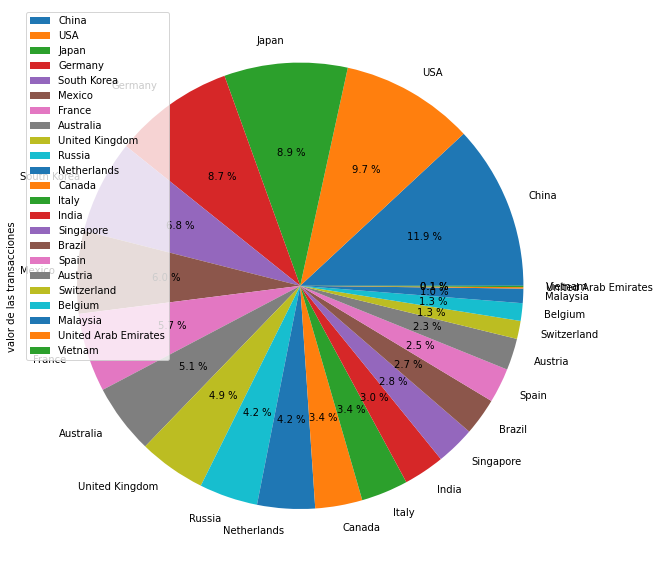

In [57]:
plt.figure(figsize=(37,10))
df3.groupby(['Pais contratista']).count().sort_values('valor de las transacciones', ascending = False).plot(kind='pie', subplots=True, autopct="%0.1f %%", figsize=(10,50)).sum()
                                    #  freq = df.groupby(['A']).count() 

Nuestra base de datos indica que hubo un total de 19056 transacciones. En la anaterior tabla podemos observar la participación de cada país en el total de transacciones, siendo EU y China, los participantes más destacados de la lista. 

In [33]:
valor_total = df3.sum()
print(valor_total)
ventasmundiales = 215691298000

                                    #  freq = df.groupby(['A']).count() 

valor de las transacciones                                         215691298000
Pais contratista              JapanJapanJapanJapanJapanJapanJapanJapanJapanJ...
dtype: object


In [34]:
ochenta_porciento = (80*ventasmundiales)/100
print(ochenta_porciento)

172553038400.0


In [35]:
print("El 80% del valor de las transacciones es de: ", ventasmundiales-ochenta_porciento)

El 80% del valor de las transacciones es de:  43138259600.0


Como podemo ver en la gráfica de pastel, las participaciones más importantes en la generación de valor de las transacciones de las imoprtaciones y exportaciones se encuentra en países:

1)China (11.9%)
2)EUA (9.7%)
3)Japón (8.9%)
4)Alemania (8.7%)
5)Corea del Sur (6.8%)
6)México (6%)
7)Francia (5.7%)
8)Australia (5.1%)
9)RU (4.9%)
10) Rusia (4.2%)
11) Holanda (4.2%)
12) Canadá (3.4%)
13) Italia (3.4%)

Estos paises generan más del 80% del valor de las importaciones y exportacionesos. Y son los países en los que se debería de concentrar Synergye Logistcis. 

¿Cuál opción u opciones es conveniente implementar como base en la estrategia?

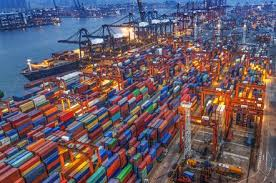

In [1]:
from IPython.display import Image
Image("D:\Descargas\EMTECH\imagenjupyuter.jpg")

Como pudimos observar en nuestros resultados, las 3 opciones analizadas nos muestran las áreas de oportunidad de la empresa. Como podemos ver, las rutas más imortantes de importación de la empresa se encuentran en China (Asia), mientras que las rutas más importantes de las exportaciones, se encuentran en Europa. Es claro, entonces que Synergye Logistics invierta en infraestructura física en estas dos regiones y consolide su posición en estas latitudes geográficas. De igual forma, estas inversiones tendrían que enfocarse en el principla medio de transporte por el cual se realizan las transacciones: el mar. La empresa debe ser financiera solvente para poder mejorar la calidad su capacidad instalida en sus puertos (pues es el principal medio por donde se realizan las transacciones). Finalmente es claro que la partipación de China dentro del volumen de las exportaciones-importaciones es sumamente importante junto Estados Unidos. Ante ello, Synergye Logistcs debe afianzar política y económicamente su posición dentro del mercado Chino y estadounidense pues China y EU representan los principales clientes de Synergye Logistics. Claramente sin olvidar a otros importantes clientes como Japón, Alemania o México. 

Entonces es clara cúal debería de ser la estrategia de la empresa con los datos analizados, para que pueda ser una empresas eficiente y financieramente solvente:

1) Fortalecer la infraestrutura física en sus rutas más importantes de exportación e importación que se encuentran en Asia y Europa. 
2) Pero a la luz de los datos encontrados, dichas inversiones físicas deberían estar encaminadas hacia el fortalecimiento de la infraestructura marítima que es el medio en donde la mayoría de las transacciones realiza la empresa. 
3) Esta estrtegia es recomendable que se realizan en los países que son los más clientes más importantes de la empresa, que en este caso son Estados Unidos y China. Es decir, al empresa debe colaborar de cerca con las autoridades económicias, jurídicas y política de estos países pero también sin olvidar a otros cleientes potenciales, como es caso de Japón o Alemania. 


Como conclusión comento que Synergye tiene muchas áreas de oportunidad con sus principales clientes, pues tanto como China como EU, están pryectados a ser las dos principales potencias económicas del mundo en el futuro cercano y por ello, es necesario que la empresa se encuentre, en ese momento, como un socio comercial importante para ambos países. Una empresa en la que pueden confiar y saber de  nuestra solvencia financiera en los mercados internacionales y soliez económica dentro del comercio internacional. La empresa, con este analisis debe tener mayor claridad sobre los pasos que se deben tomar para salvaguardar y expandir la fortaleza operativa y económica de Synergye Logistics en el mediano y largo plazo. 

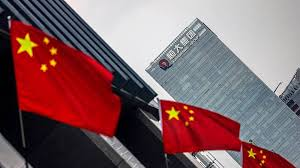

In [2]:
from IPython.display import Image
Image("D:\Descargas\EMTECH\china.jpg")

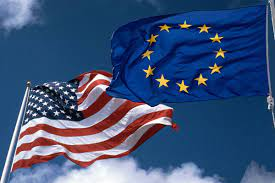

In [3]:
from IPython.display import Image
Image("D:\Descargas\EMTECH\euu y ue.jpg")

Datos:

Gustavo Múzquiz Rodríguez
gustavo.muzquiz@upaep.edu.mx
tel 2224028472